In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)
X = X.astype(np.float32)
y = y.astype(np.float32).reshape(-1, 1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


In [5]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test)

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  # Linear layer

    def forward(self, x):
        return self.linear(x)


In [7]:
input_dim = X_train.shape[1]  # Number of features
output_dim = 1  # Single output
model = LinearRegressionModel(input_dim, output_dim)

In [8]:
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.0508
Epoch [200/1000], Loss: 0.0244
Epoch [300/1000], Loss: 0.0240
Epoch [400/1000], Loss: 0.0240
Epoch [500/1000], Loss: 0.0240
Epoch [600/1000], Loss: 0.0240
Epoch [700/1000], Loss: 0.0240
Epoch [800/1000], Loss: 0.0240
Epoch [900/1000], Loss: 0.0240
Epoch [1000/1000], Loss: 0.0240


In [10]:
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0221


In [11]:
import matplotlib.pyplot as plt

# Convert predictions and true values back to original scale
predicted_values = scaler_y.inverse_transform(predictions.numpy())
true_values = scaler_y.inverse_transform(y_test)


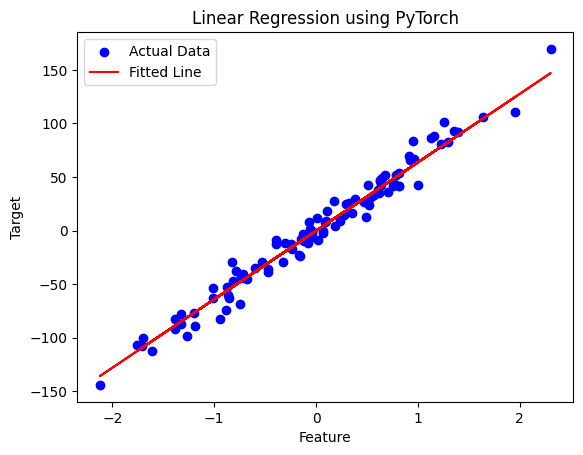

In [12]:
plt.scatter(X_test, true_values, color='blue', label='Actual Data')
plt.plot(X_test, predicted_values, color='red', label='Fitted Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression using PyTorch')
plt.legend()
plt.show()
